In [20]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from termcolor import colored
import matplotlib.pyplot as plt


# ROC

In [21]:
print(colored('Genero dos clases' ,attrs=['bold']))
X, y = make_classification(n_samples = 1000, n_classes = 2)

Genero dos clases


In [22]:
print(colored('Particiono el conjunto en datos de entrenamiento y de prueba' ,attrs=['bold']))
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

Particiono el conjunto en datos de entrenamiento y de prueba


In [23]:
print(colored('Entreno el modelo' ,attrs=['bold']))
model = LogisticRegression(solver = 'lbfgs')
model.fit(X_train, y_train)

Entreno el modelo


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
print(colored('Realizo la predicción' ,attrs=['bold']))
y_predict = model.predict(X_test)

Realizo la predicción


In [25]:
"""
    @Description Metodo que calcula la probabilidad de el evento
    @param model: Modelo instanciado
    @param X_test: Particionamiento de prueba de los predictores
    @param y_test: Particionamiento de prueba de la clase objetivo
    
    @return dos valores. El primero es la probabilidad de una prueba sin habilidad de diagnostico. 
    El segundo es la prueba del modelo
"""
def test_skill_diagnosis(model, X_test, y_test):
    #Calcula la probabilidad de la prueba sin habilidad de diagnostico
    test_no_skill = [0 for _ in range(len(y_test))]
    #Calcula la probabilidad de la prueba con habilidad de diagnostico
    probabilidad_test_skill = model.predict_proba(X_test)
    #Extrae la probabilidad del evento a predecir (churm)
    probabilidad_test_skill = probabilidad_test_skill[:,1]
    
   
    
    return test_no_skill, probabilidad_test_skill
    

In [26]:
print(colored('Probabilidad de las pruebas de diagnostico' ,attrs=['bold']))
test_no_skill, probabilidad_test_skill = test_skill_diagnosis(model, X_test, y_test)

Probabilidad de las pruebas de diagnostico


In [27]:
print(colored('Resumen scores' ,attrs=['bold']))
print(colored('No Skill: ROC AUC=%.3f' % (roc_auc_score(y_test, test_no_skill)) ,attrs=['bold']))
print(colored('Model: ROC AUC=%.3f' % (roc_auc_score(y_test, probabilidad_test_skill)) ,attrs=['bold']))

Resumen scores
No Skill: ROC AUC=0.500
Model: ROC AUC=0.946


In [28]:
print(colored('El AUC de las pruebas de diagnostico' ,attrs=['bold']))
noSkill_fp_prob, noSkill_vp_prob, _ = roc_curve(y_test, test_no_skill)
skill_fp_prob, skill_vp_prob, _ = roc_curve(y_test, probabilidad_test_skill)

El AUC de las pruebas de diagnostico


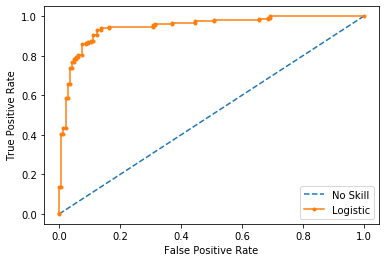

In [29]:
plt.plot(noSkill_fp_prob, noSkill_vp_prob, linestyle='--', label='No Skill')
plt.plot(skill_fp_prob, skill_vp_prob, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# Curvas de recuperación

In [30]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

In [31]:
print(colored('Genero dos clases' ,attrs=['bold']))
X_, y_ = make_classification(n_samples = 2000, n_classes = 2)

Genero dos clases


In [32]:
print(colored('Particiono el conjunto en datos de entrenamiento y de prueba' ,attrs=['bold']))
trainX,testX,trainy,testy = train_test_split(X_,y_,test_size = 0.5)

Particiono el conjunto en datos de entrenamiento y de prueba


In [33]:
print(colored('Instancio y entreno el modelo' ,attrs=['bold']))
model = LogisticRegression(solver='lbfgs')
model.fit(trainX,trainy)

Instancio y entreno el modelo


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
print(colored('Predigo probabilidades' ,attrs=['bold']))
probs = model.predict_proba(testX)
print(colored('mantener las probabilidades para el resultado positivo solamente' ,attrs=['bold']))
probs = probs[:,1]

Predigo probabilidades
mantener las probabilidades para el resultado positivo solamente


In [35]:
print(colored('Predicción del modelo' ,attrs=['bold']))
y_predic = model.predict(testX)

Predicción del modelo


In [36]:
print(colored('Curva de precisión y recuperación' ,attrs=['bold']))
precision, recall, _ = precision_recall_curve(testy,probs)
print(colored('f1-score' ,attrs=['bold']))
f1_score = f1_score(testy,y_predic)
print(colored('AUC' ,attrs=['bold']))
auc_score = auc(recall,precision)

Curva de precisión y recuperación
f1-score
AUC


In [37]:
print(colored('Resumen' ,attrs=['bold']))
print(colored('Logistic: f1=%.3f auc=%.3f' %(f1_score,auc_score) ,attrs=['bold']))

Resumen
Logistic: f1=0.830 auc=0.913


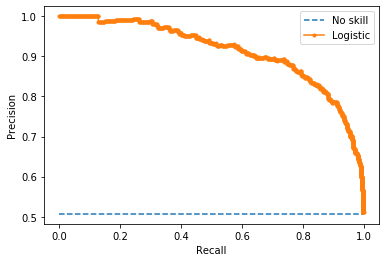

In [38]:
no_skill = len(testy[testy==1])/len(testy)
plt.plot([0,1],[no_skill,no_skill],linestyle='--', label='No skill')
plt.plot(recall,precision,marker='.',label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()

- https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
- **Jason Brownlee**